# Gradient descent

$X \sim \mathcal{U}(0,1)$

$y = 2 + 9X + \epsilon$

$\epsilon \sim \mathcal{N}(0,1)$

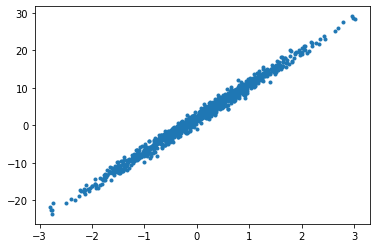

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

samples = 1000
X = np.random.randn(samples, 1)
noise = np.random.randn(samples, 1)
y = 2 + 9*X + noise
plt.plot(X,y, '.')

In [27]:
X

array([[ 5.13307117e-01],
       [-9.82201674e-02],
       [ 9.95449193e-01],
       [-1.40520173e+00],
       [-1.11798206e+00],
       [ 6.21343606e-01],
       [ 2.13537308e-01],
       [ 9.46464529e-01],
       [-1.63835646e+00],
       [-8.27093034e-01],
       [-6.63082045e-01],
       [-1.52133812e-01],
       [-7.69908198e-01],
       [ 1.52636666e+00],
       [-4.98555122e-01],
       [ 2.39835156e-01],
       [-1.79985234e-01],
       [-1.39740437e+00],
       [-8.39883546e-01],
       [-5.99756271e-01],
       [-2.15702894e-01],
       [ 9.22146902e-01],
       [-1.04500720e+00],
       [-7.81911411e-01],
       [ 3.21611565e-01],
       [ 2.30557997e-01],
       [-8.41671214e-01],
       [ 2.96741494e-01],
       [ 1.07849887e+00],
       [ 8.52272036e-01],
       [ 8.44993657e-02],
       [-1.93755742e-01],
       [ 6.04523882e-01],
       [-1.62040592e-01],
       [-2.14637014e+00],
       [-3.91428361e-02],
       [-3.95267732e-01],
       [ 1.84512781e+00],
       [ 1.2

In [4]:
X = np.c_[np.ones(samples), X] # np.c_ - concatenates
X[:5]

array([[ 1.        , -1.1883432 ],
       [ 1.        , -0.52735251],
       [ 1.        ,  1.6286865 ],
       [ 1.        , -0.49508432],
       [ 1.        ,  0.84633796]])

In [24]:
y

array([[-1.05797064e+01],
       [-2.19292662e+00],
       [ 1.71774462e+01],
       [-4.22932764e+00],
       [ 9.22437825e+00],
       [-5.26999360e+00],
       [ 6.82671259e+00],
       [ 1.07251607e+01],
       [-8.95135366e+00],
       [-4.29974544e+00],
       [ 7.75262636e+00],
       [ 5.19557427e+00],
       [-9.74064884e+00],
       [ 4.69531392e+00],
       [-5.41998361e+00],
       [-1.42951478e-01],
       [-1.86164679e+01],
       [-1.66500947e+01],
       [-1.24244916e+00],
       [ 3.48772788e+00],
       [-1.28958628e+01],
       [ 1.70809374e+00],
       [ 9.75398951e+00],
       [ 2.00433682e+01],
       [-1.02492626e+01],
       [-3.52433218e+00],
       [-4.10959919e+00],
       [ 3.95454181e+00],
       [ 6.62464093e-02],
       [ 9.59542696e+00],
       [ 6.77666144e+00],
       [ 1.26550496e+01],
       [-5.50028384e+00],
       [ 2.65099344e+00],
       [ 4.68100442e+00],
       [ 8.61914957e+00],
       [-1.91335398e+01],
       [ 4.79296380e+00],
       [ 6.2

## Train|test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

In [6]:
m = len(X)
m

1000

In [7]:
X

array([[ 1.        , -1.1883432 ],
       [ 1.        , -0.52735251],
       [ 1.        ,  1.6286865 ],
       ...,
       [ 1.        , -0.81566639],
       [ 1.        ,  0.11909363],
       [ 1.        , -1.14282514]])

In [8]:
X.shape

(1000, 2)

In [15]:
theta = np.random.randn(X.shape[1], 1)
theta

array([[-2.02338991],
       [ 0.42230461]])

In [16]:
epochs=100
learning_rate=0.1
for _ in range(epochs):
    gradient = 2 / m * X.T @ (X @ theta - y)
    theta -= learning_rate*gradient

In [17]:
theta

array([[1.9611659 ],
       [8.91860977]])

In [19]:
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate*gradient
    
    return theta

theta = gradient_descent(X_train, y_train)
theta.reshape(-1)


array([1.96408879, 8.9371032 ])

In [20]:
epochs = range(1,200)
thetas = np.array([gradient_descent(X_train, y_train, epochs = epoch).reshape(-1) for epoch in epochs])

In [21]:
thetas

array([[-0.03180805,  1.25086486],
       [ 0.61658258,  4.92467511],
       [ 1.36133344,  4.61567259],
       [ 1.26625605,  4.96969133],
       [ 0.78119594,  6.76320022],
       [ 1.0129919 ,  6.49083406],
       [ 1.68589934,  7.38821537],
       [ 1.27583794,  7.42170349],
       [ 1.28629274,  7.60783717],
       [ 1.46834252,  8.00982628],
       [ 1.61349233,  8.2203612 ],
       [ 1.6621011 ,  8.41103236],
       [ 1.73269455,  8.50849042],
       [ 1.75814659,  8.60055393],
       [ 1.90892597,  8.63727274],
       [ 1.80188227,  8.69504406],
       [ 1.88877051,  8.80064296],
       [ 1.89024902,  8.79857576],
       [ 1.90369093,  8.80515322],
       [ 1.92004997,  8.86034287],
       [ 1.9263163 ,  8.86887814],
       [ 1.93625347,  8.88366342],
       [ 1.93610011,  8.89409434],
       [ 1.94732076,  8.90631189],
       [ 1.94616452,  8.90632702],
       [ 1.95072519,  8.91729206],
       [ 1.94958604,  8.9184251 ],
       [ 1.95632211,  8.92644341],
       [ 1.9543932 ,

In [22]:
thetas.shape

(199, 2)

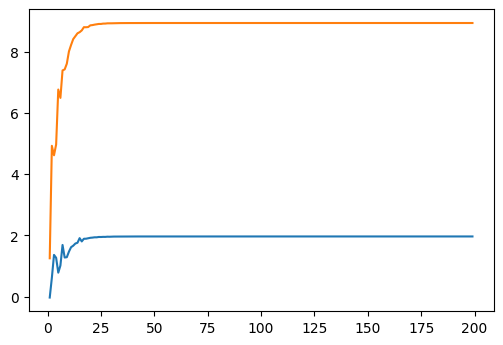

In [23]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(epochs, thetas)

## Stochastic gradient descent (SGD)

In [32]:
epochs = 5 
t0, t1 = 5, 50 # learning schedule parameters


def learning_rate_schedule(t):
    """"Decrease learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m + i)
        theta -= eta*gradients

theta


array([[2.05732939],
       [9.024672  ]])